In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("/content/final_dataset.csv")
df.head()

,Movie Title,Plot,Poster_URL,Imdb rating,Age rating
0,Toy Story,A little boy named Andy loves to be in his roo...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,8.3,"['Argentina:Atp', 'Australia:G', 'Austria:0', ..."
1,Jumanji,"Jumanji, one of the most unique--and dangerous...",https://m.media-amazon.com/images/M/MV5BZTk2Zm...,7.0,"['Argentina:Atp', 'Australia:PG', 'Brazil:12',..."
2,Grumpier Old Men,Things don't seem to change much in Wabasha Co...,https://m.media-amazon.com/images/M/MV5BMjQxM2...,6.6,"['Argentina:Atp', 'Australia:PG', 'Finland:S',..."
3,Waiting to Exhale,This story based on the best selling novel by ...,https://m.media-amazon.com/images/M/MV5BYzcyMD...,5.9,"['Argentina:13', 'Australia:M', 'Canada:14A', ..."
4,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", Georg...",https://m.media-amazon.com/images/M/MV5BOTEyNz...,6.0,"['Argentina:Atp', 'Australia:G', 'Brazil:Livre..."


In [8]:
print(df.columns.tolist())

['Movie Title', 'Plot', 'Poster_URL', 'Imdb rating', 'Age rating']


In [9]:
print(df['Age rating'].dtype)

object


In [10]:
age_ratings = {}
ratings_imdb = {} # Num of movies with imdb rating > 7 corresponding to this age rating

for index, row in df.iterrows():
  curr = row['Age rating']
  curr = str(curr)
  ind = curr.find("Argentina:")
  if ind != -1:
    apostropheat = curr.find("'", ind)
    rt = curr[ind + 10: apostropheat]
    # print(curr[ind:apostropheat])
    if rt not in age_ratings:
      age_ratings[rt] = 1
    else:
      age_ratings[rt] += 1
    if rt not in ratings_imdb:
      ratings_imdb[rt] = 0
    # find num of movies with imdb rating > 7 corresponding to this age rating
    if row['Imdb rating'] >= 7.0:	
      ratings_imdb[rt] += 1

In [11]:
print(age_ratings)

{'Atp': 1642, '13': 2633, '16': 1423, '18': 546, '18::(with warning)': 5, 'X::(orginal rating)': 1, '14': 108, 'M::(DVD rating)': 1, 'X': 54, '16::(with warning)': 16, 'Unrated': 13, '13::(DVD rating)': 9, '18::(cable rating)': 3, '16::(video rating)': 2, '18::(VHS and DVD rating)': 1, '13::(theatrical rating)': 1, '13::(with warning)': 35, 'Atp::(DVD rating)': 8, '14::(theatrical rating)': 1, '16::(cable rating)': 1, 'Atp::(CR)': 2, '13::(with restriction)': 1, '16::(self-applied)': 1, '13::(VHS rating)': 1, 'X::(Banned until 1983)': 1, '16::(DVD rating)': 3, 'ATP': 1, 'M': 1, '13::(with discretion)': 2, '18::(with restriction)': 1, '16::(with discretion)': 1, 'Atp::(with discretion)': 1, 'Atp::(with restriction)': 1, 'Atp::(CL)': 2, 'Atp::(with warning)': 8, 'Atp::(TV rating)': 3}


In [12]:
print(ratings_imdb)

{'Atp': 727, '13': 1107, '16': 651, '18': 267, '18::(with warning)': 2, 'X::(orginal rating)': 0, '14': 65, 'M::(DVD rating)': 0, 'X': 22, '16::(with warning)': 7, 'Unrated': 9, '13::(DVD rating)': 6, '18::(cable rating)': 0, '16::(video rating)': 0, '18::(VHS and DVD rating)': 0, '13::(theatrical rating)': 0, '13::(with warning)': 14, 'Atp::(DVD rating)': 5, '14::(theatrical rating)': 0, '16::(cable rating)': 0, 'Atp::(CR)': 0, '13::(with restriction)': 1, '16::(self-applied)': 0, '13::(VHS rating)': 0, 'X::(Banned until 1983)': 0, '16::(DVD rating)': 1, 'ATP': 1, 'M': 0, '13::(with discretion)': 1, '18::(with restriction)': 0, '16::(with discretion)': 0, 'Atp::(with discretion)': 0, 'Atp::(with restriction)': 0, 'Atp::(CL)': 1, 'Atp::(with warning)': 4, 'Atp::(TV rating)': 0}


In [13]:
fin_age_ratings = {}
fin_age_ratings['Atp'] = 0
fin_age_ratings['13'] = 0
fin_age_ratings['16'] = 0
fin_age_ratings['18'] = 0
fin_age_ratings['Unrated'] = 0
fin_age_ratings['Other'] = 0

In [14]:
fin_ratings_imdb = {}
fin_ratings_imdb['Atp'] = 0
fin_ratings_imdb['13'] = 0
fin_ratings_imdb['16'] = 0
fin_ratings_imdb['18'] = 0
fin_ratings_imdb['Unrated'] = 0
fin_ratings_imdb['Other'] = 0

In [15]:
for i in age_ratings:
  curr = i.lower()
  if curr.find('atp') != -1:
    fin_age_ratings['Atp'] += age_ratings[i]
  elif curr.find('13') != -1 or curr.find('14') != -1:
    fin_age_ratings['13'] += age_ratings[i]
  elif curr.find('16') != -1:
    fin_age_ratings['16'] += age_ratings[i]
  elif curr.find('18') != -1:
    fin_age_ratings['18'] += age_ratings[i]
  elif curr.find('unrated') != -1:
    fin_age_ratings['Unrated'] += age_ratings[i]
  else:
    fin_age_ratings['Other'] += age_ratings[i]

In [16]:
for i in ratings_imdb:
  curr = i.lower()
  if curr.find('atp') != -1:
    fin_ratings_imdb['Atp'] += ratings_imdb[i]
  elif curr.find('13') != -1 or curr.find('14') != -1:
    fin_ratings_imdb['13'] += ratings_imdb[i]
  elif curr.find('16') != -1:
    fin_ratings_imdb['16'] += ratings_imdb[i]
  elif curr.find('18') != -1:
    fin_ratings_imdb['18'] += ratings_imdb[i]
  elif curr.find('unrated') != -1:
    fin_ratings_imdb['Unrated'] += ratings_imdb[i]
  else:
    fin_ratings_imdb['Other'] += ratings_imdb[i]

fin_ratings_imdb['Atp'] /= fin_age_ratings['Atp']/100 # For percentage
fin_ratings_imdb['13'] /= fin_age_ratings['13']/100
fin_ratings_imdb['16'] /= fin_age_ratings['16']/100
fin_ratings_imdb['18'] /= fin_age_ratings['18']/100
fin_ratings_imdb['Unrated'] /= fin_age_ratings['Unrated']/100
fin_ratings_imdb['Other'] /= fin_age_ratings['Other']/100

In [17]:
print(fin_age_ratings)

{'Atp': 1668, '13': 2791, '16': 1447, '18': 556, 'Unrated': 13, 'Other': 58}


In [18]:
print(fin_ratings_imdb)

{'Atp': 44.24460431654676, '13': 42.780365460408454, '16': 45.542501727712505, '18': 48.38129496402878, 'Unrated': 69.23076923076923, 'Other': 37.931034482758626}


In [19]:
import matplotlib.pyplot as plt

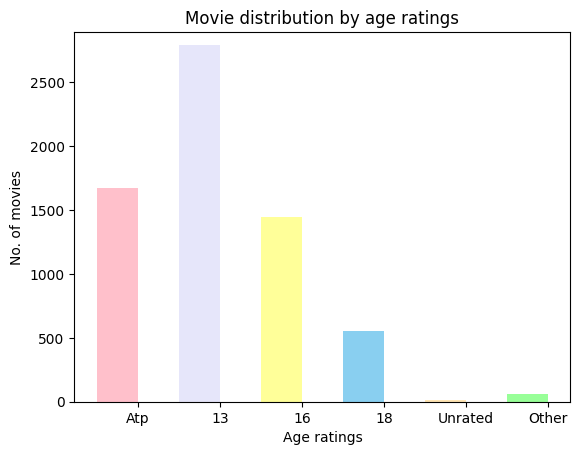

In [20]:
values = list(fin_age_ratings.values())

y_min = 0
y_max = max(values) + 100

bar_width = 0.5

x_values = range(len(values))
x_left = [x_val - bar_width/2 for x_val in x_values]

bar_heights = values

plt.bar(x_left, bar_heights, width=bar_width, color=['#FFC0CB', '#E6E6FA', '#FFFF99', '#89CFF0', '#FFE5B4', '#98FF98']
)
plt.xticks(x_values, list(fin_age_ratings.keys()))
plt.ylim(y_min, y_max)
plt.ylabel('No. of movies')
plt.xlabel('Age ratings')
plt.title('Movie distribution by age ratings')
plt.show()

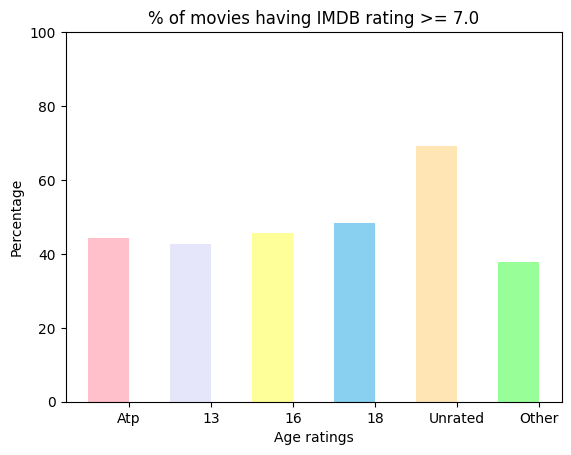

In [21]:
values = list(fin_ratings_imdb.values())

y_min = 0
y_max = 100

bar_width = 0.5

x_values = range(len(values))
x_left = [x_val - bar_width/2 for x_val in x_values]

bar_heights = values

plt.bar(x_left, bar_heights, width=bar_width, color=['#FFC0CB', '#E6E6FA', '#FFFF99', '#89CFF0', '#FFE5B4', '#98FF98'])
plt.xticks(x_values, list(fin_ratings_imdb.keys()))
plt.ylim(y_min, y_max)
plt.ylabel('Percentage')
plt.xlabel('Age ratings')
plt.title('% of movies having IMDB rating >= 7.0')
plt.show()

###Top 10 movies

In [28]:
top_10_movies = df.nlargest(10, 'Imdb rating')
top_10_movies = top_10_movies[['Movie Title', 'Imdb rating']]
top_10_movies.head()

,Movie Title,Imdb rating
3779,Band of Brothers,9.4
284,The Shawshank Redemption,9.3
6133,Cosmos,9.3
8458,The Day of the Doctor,9.3
6694,The Godfather,9.2


In [29]:
top_10_movies.tail()

,Movie Title,Imdb rating
8007,The Civil War,9.1
472,Schindler's List,9.0
3632,The Lord of the Rings: The Return of the King,9.0
4432,Dekalog,9.0
5522,The Dark Knight,9.0
